In [1]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt

# Load model path into logic_ensemble object

In [ ]:
project_name = 'calzone_cellfate'
model_path = '/home/spankaew/Git/astrologics/models/calzone_cellfate/'
model = le.LogicEnsemble(model_path, project_name = project_name)
model.create_simulation()

Simulation object created


In [3]:
model.create_attractor()
model.attractor.get_attractors(num_cores = 15)
model.attractor.attractors_df

Attractor object created


Processing models: 100%|██████████| 616/616 [00:10<00:00, 59.93it/s] 

Attractors calculation completed



/home/spankaew/Git/astrologics/astrologics/model_attractors.py:81: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


,bn168,bn602,bn157,bn45,bn8,bn109,bn307,bn12,bn530,bn321,bn547,bn487,bn408,bn404,bn566,bn494,bn580,bn65,bn122,bn421,bn170,bn42,bn351,bn553,bn186,bn326,bn238,bn131,bn212,bn499,bn369,bn383,bn250,bn572,bn341,bn60,bn215,bn391,bn206,bn116,bn224,bn465,bn100,bn271,bn571,bn542,bn442,bn534,bn70,bn588,bn434,bn28,bn436,bn457,bn301,bn455,bn138,bn389,bn150,bn384,bn63,bn416,bn73,bn309,bn515,bn305,bn493,bn87,bn207,bn58,bn118,bn578,bn500,bn189,bn450,bn523,bn255,bn125,bn320,bn261,bn381,bn370,bn587,bn254,bn374,bn105,bn244,bn74,bn135,bn99,bn11,bn430,bn611,bn226,bn158,bn498,bn235,bn334,bn417,bn120,bn316,bn30,bn368,bn288,bn609,bn400,bn249,bn110,bn382,bn199,bn16,bn362,bn88,bn490,bn388,bn460,bn222,bn201,bn141,bn375,bn3,bn177,bn279,bn205,bn600,bn294,bn345,bn179,bn476,bn449,bn352,bn41,bn32,bn557,bn85,bn454,bn227,bn584,bn128,bn412,bn82,bn482,bn53,bn237,bn533,bn91,bn62,bn101,bn396,bn4,bn298,bn111,bn236,bn39,bn297,bn411,bn610,bn64,bn453,bn156,bn509,bn123,bn27,bn61,bn601,bn574,bn606,bn273,bn540,bn139,bn7,bn162,bn495,bn537,bn97,bn290,bn431,bn14,bn230,bn57,bn144,bn603,bn173,bn451,bn485,bn178,bn311,bn130,bn246,bn489,bn608,bn461,bn267,bn349,bn486,bn20,bn473,bn318,bn429,bn197,bn339,bn427,bn300,bn263,bn501,bn340,bn445,bn462,bn475,bn18,bn546,bn507,bn54,bn104,bn159,bn192,bn176,bn95,bn551,bn223,bn333,bn160,bn175,bn397,bn615,bn161,bn562,bn152,bn373,bn592,bn432,bn539,bn468,bn166,bn328,bn392,bn25,bn402,bn573,bn390,bn599,bn24,bn470,bn367,bn204,bn488,bn458,bn137,bn242,bn541,bn67,bn38,bn314,bn343,bn293,bn29,bn513,bn423,bn522,bn164,bn567,bn556,bn289,bn355,bn319,bn145,bn613,bn467,bn428,bn245,bn72,bn596,bn231,bn516,bn348,bn324,bn127,bn98,bn395,bn483,bn479,bn480,bn229,bn240,bn560,bn140,bn136,bn252,bn517,bn598,bn607,bn536,bn401,bn466,bn332,bn50,bn529,bn209,bn31,bn132,bn544,bn5,bn296,bn405,bn295,bn492,bn49,bn491,bn317,bn196,bn503,bn90,bn464,bn543,bn313,bn35,bn322,bn575,bn37,bn119,bn591,bn304,bn439,bn478,bn524,bn527,bn203,bn337,bn586,bn154,bn565,bn440,bn0,bn422,bn282,bn550,bn380,bn443,bn81,bn83,bn506,bn169,bn593,bn257,bn410,bn456,bn228,bn548,bn387,bn79,bn604,bn185,bn559,bn342,bn407,bn80,bn253,bn172,bn268,bn448,bn398,bn576,bn75,bn283,bn399,bn211,bn525,bn338,bn444,bn612,bn9,bn452,bn354,bn406,bn46,bn96,bn194,bn425,bn26,bn308,bn10,bn521,bn579,bn270,bn447,bn303,bn568,bn13,bn589,bn21,bn148,bn36,bn181,bn191,bn260,bn184,bn510,bn353,bn581,bn269,bn532,bn23,bn471,bn519,bn299,bn155,bn44,bn134,bn129,bn564,bn106,bn33,bn167,bn93,bn233,bn323,bn528,bn558,bn149,bn595,bn597,bn552,bn183,bn287,bn549,bn306,bn277,bn545,bn193,bn112,bn146,bn415,bn86,bn514,bn512,bn585,bn210,bn107,bn315,bn34,bn469,bn594,bn55,bn518,bn377,bn379,bn218,bn441,bn259,bn115,bn393,bn386,bn394,bn302,bn459,bn265,bn171,bn426,bn40,bn256,bn614,bn347,bn143,bn165,bn329,bn511,bn180,bn239,bn371,bn331,bn563,bn182,bn284,bn84,bn2,bn276,bn497,bn366,bn133,bn6,bn554,bn202,bn357,bn278,bn336,bn59,bn92,bn52,bn414,bn77,bn365,bn526,bn363,bn281,bn47,bn361,bn153,bn280,bn330,bn108,bn335,bn17,bn496,bn68,bn76,bn114,bn378,bn219,bn359,bn266,bn216,bn292,bn151,bn350,bn142,bn424,bn225,bn232,bn124,bn286,bn372,bn275,bn113,bn327,bn583,bn1,bn438,bn56,bn344,bn505,bn385,bn214,bn187,bn248,bn251,bn419,bn474,bn163,bn174,bn535,bn590,bn94,bn472,bn420,bn570,bn71,bn190,bn484,bn433,bn195,bn147,bn481,bn437,bn51,bn463,bn19,bn48,bn577,bn403,bn43,bn605,bn409,bn538,bn103,bn413,bn569,bn69,bn520,bn247,bn198,bn221,bn312,bn435,bn272,bn208,bn121,bn78,bn531,bn582,bn262,bn446,bn555,bn325,bn346,bn418,bn358,bn561,bn376,bn477,bn102,bn243,bn258,bn213,bn274,bn264,bn360,bn508,bn89,bn234,bn502,bn291,bn220,bn117,bn241,bn285,bn188,bn126,bn66,bn310,bn22,bn217,bn15,bn200,bn356,bn364,bn504
000000000000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1

# Calculate attractors from the model cohorts
In this part of the script, we calculate attractors from cohorts of model, and compared using clustermap

# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

In [69]:
test = pd.read_csv(model_path + 'bn_0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))
node_list = test[0]

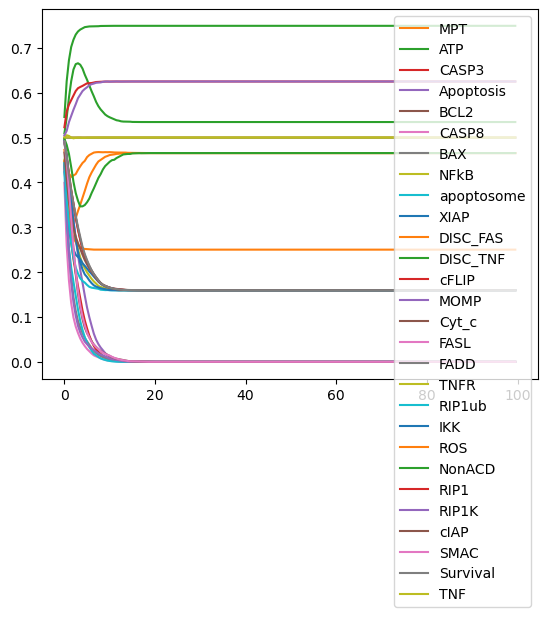

In [71]:
import maboss
test = maboss.loadBNet(model_path + 'bn_0.bnet')
test.param['max_time'] = 100
for i in node_list:
    test.network.set_istate(i, [0.5,0.5])
sim = test.run()
sim.plot_node_trajectory()

In [ ]:
model.simulation.update_parameters(max_time = 20,thread_count = 15, sample_count = 2000)
model.simulation.run_simulation(initial_state=test_dict)

Start simulation


100%|██████████| 1000/1000 [06:56<00:00,  2.40it/s]


Simulation completed


Trajectory object created


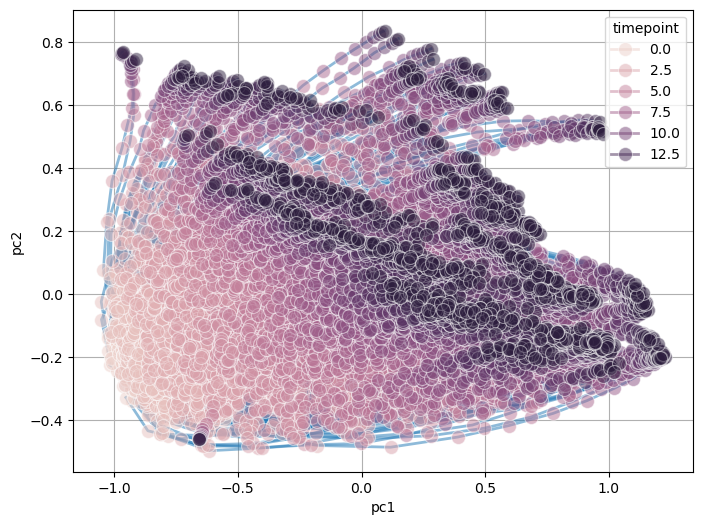

In [5]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

In [6]:
save_path = '/home/spankaew/Git/astrologics/models/' 
model.simulation.simulation_df.to_csv(save_path + project_name + '_simulation.csv')

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

In [8]:
import numpy as np
# Setup the 
pca_df = model.trajectory.pca_df
pca_df.model_id = pca_df.model_id.astype('category')
model_name = pca_df.model_id.cat.categories

simulation_df = model.simulation.simulation_df
simulation_df.model_id = simulation_df.model_id.astype('category')
node_list = simulation_df.columns.drop(['timepoint','model_id'])

model_original_all = {}
for i in model_name:
    model_original = simulation_df.loc[simulation_df.model_id == i,node_list].values
    model_original_all[i] = np.array(model_original)
pca_all_trajectory = np.array(list(model_original_all.values()))

100%|██████████| 1000/1000 [00:53<00:00, 18.60it/s]


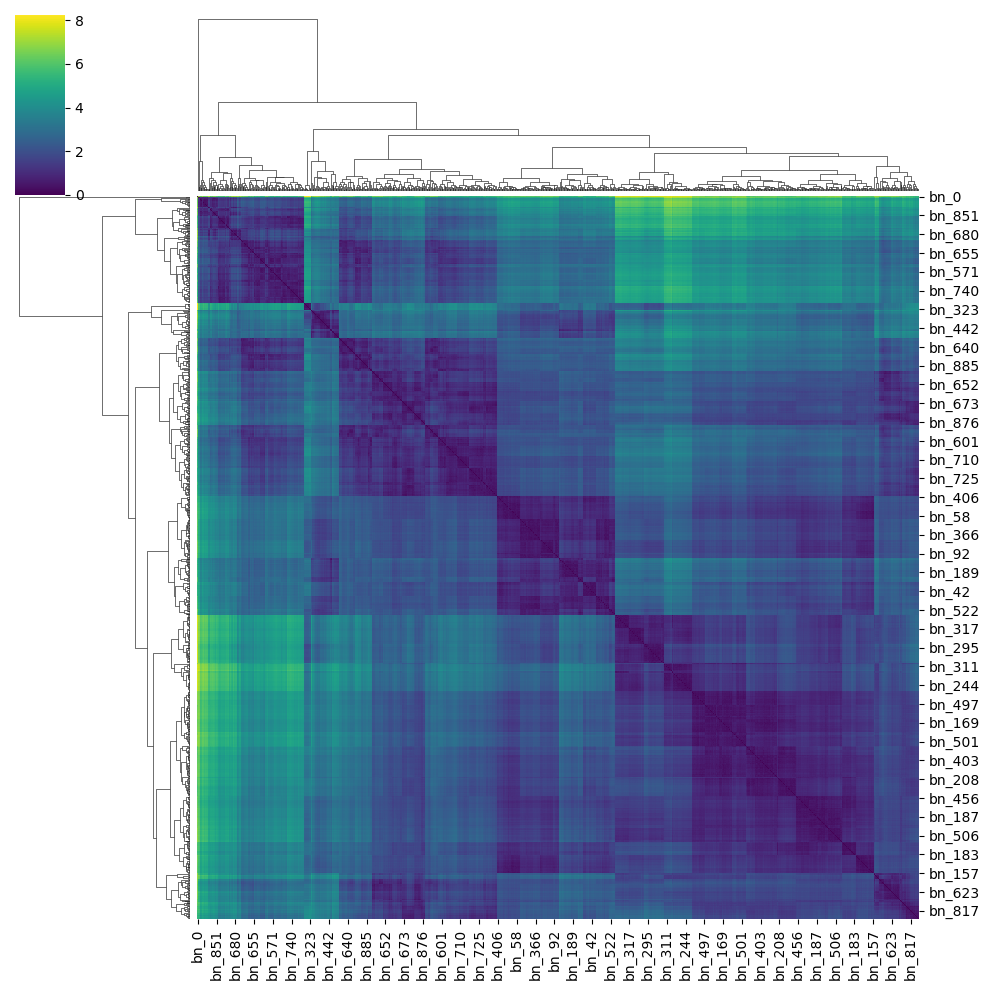

In [ ]:
from tslearn.metrics import dtw
from tqdm import tqdm

# Initialize an empty distance matrix
num_trajectories = len(pca_all_trajectory)
distance_matrix = np.zeros((num_trajectories, num_trajectories))

# Calculate DTW distance for each pair of trajectories
for i in tqdm(range(num_trajectories)):
    for j in range(num_trajectories):
        distance_matrix[i, j] = dtw(pca_all_trajectory[i], pca_all_trajectory[j])

# Display the distance matrix
distance_matrix = pd.DataFrame(distance_matrix, index=model_name, columns=model_name)
sns.clustermap(distance_matrix, cmap='viridis', figsize=(10,10))
plt.show()

/tmp/ipykernel_843048/1913171402.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


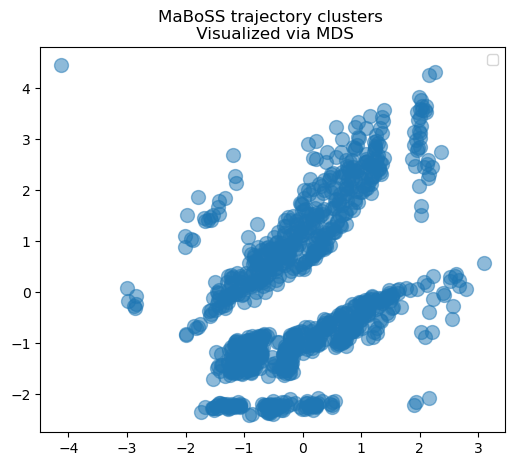

In [24]:
# Visualize clusters with MDS
from sklearn.manifold import MDS

# Visualize clusters with MDS
#distance_matrix = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=1)
coords = mds.fit_transform(distance_matrix)

plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s = 100)
plt.legend()
plt.title('MaBoSS trajectory clusters \n Visualized via MDS')
#plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/hh_trajMDS_v3.pdf')

plt.show()

plt.close()

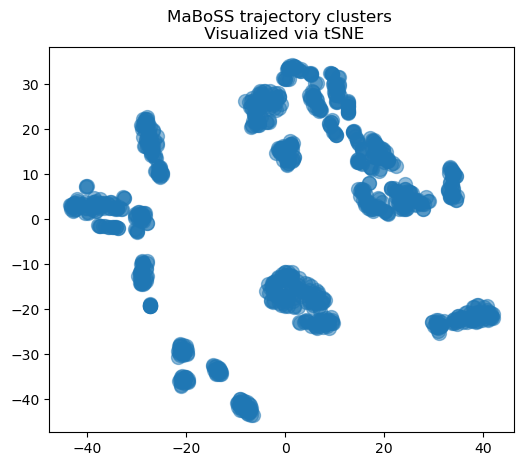

In [29]:
from sklearn.manifold import TSNE

# Visualize clusters with tSNE
tsne = TSNE(n_components=2, metric='precomputed', random_state=1234, init='random')
coords_tsne = tsne.fit_transform(distance_matrix)

plt.figure(figsize=(6, 5))
plt.scatter(coords_tsne[:, 0], coords_tsne[:, 1], alpha=0.5, s=100)
plt.title('MaBoSS trajectory clusters \n Visualized via tSNE')
plt.show()
plt.close()

coords_tsne = pd.DataFrame(coords_tsne, columns = ['x', 'y'], index = distance_matrix.index)
coords_tsne = pd.concat([coords_tsne, cluster_dict_df],axis = 1)

In [22]:
model.trajectory.calculate_kmean_cluster(n_cluster=2, data = 'original', metric = 'dtw')

cluster_dict_df = pd.DataFrame(list(model.trajectory.cluster_dict.items()), columns=['Model', 'traj_cluster'])
cluster_dict_df.set_index('Model', inplace=True)

coords_vis = pd.DataFrame(coords, columns = ['x', 'y'], index = distance_matrix.index)
coords_vis = pd.concat([coords_vis, cluster_dict_df],axis = 1)

DTW k-means


/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1

2.195 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s


1.708 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s


1.682 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s


1.681 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s


1.680 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s


1.680 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s


1.680 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s


1.680 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
/home/spankaew/Git/astrologics/astrologics/trajectory_clustering.py:222: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pca_df['kmean_cluster'] = pca_df['kmean_cluster'].replace(cluster_dict)
/home/spankaew/Git/astrologics/astrologics/trajectory_clustering.py:222: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace 

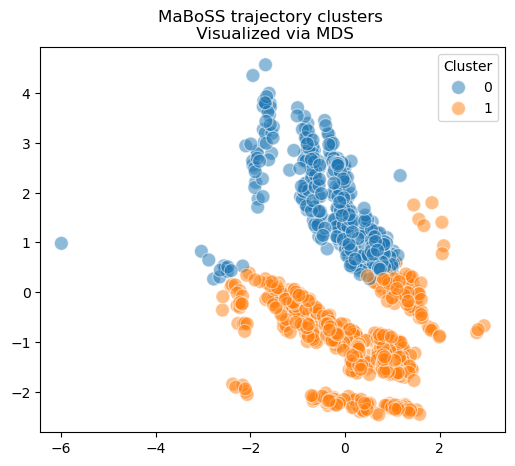

In [23]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=coords_vis, x='x', y='y', hue='traj_cluster', palette='tab10', alpha=0.5, s=100)
plt.legend(title='Cluster')
plt.title('MaBoSS trajectory clusters \n Visualized via MDS')
plt.xlabel(None)
plt.ylabel(None)

#plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/hh_trajMDS_cluster.pdf')

plt.show()
plt.close()

array([[ -8.179614 ,  26.15596  ],
       [  3.0889518, -23.098984 ],
       [-39.83321  ,   1.5983813],
       ...,
       [ 26.417933 ,   4.1302958],
       [ 17.599077 ,  11.165145 ],
       [ 21.495327 ,  12.264111 ]], dtype=float32)

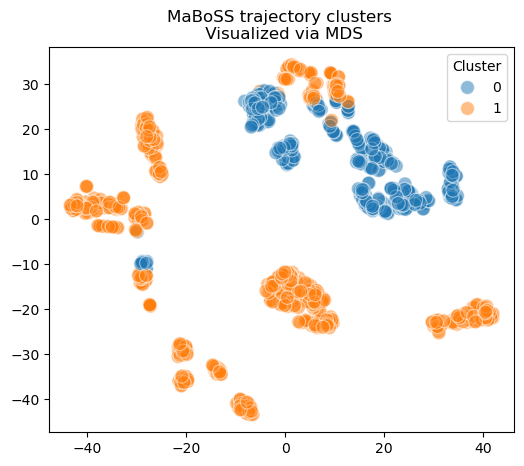

In [30]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=coords_tsne, x='x', y='y', hue='traj_cluster', palette='tab10', alpha=0.5, s=100)
plt.legend(title='Cluster')
plt.title('MaBoSS trajectory clusters \n Visualized via MDS')
plt.xlabel(None)
plt.ylabel(None)

#plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/hh_trajMDS_cluster.pdf')

plt.show()
plt.close()

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [13]:
model.create_logic()
model.logic.create_flattend_logic_clause()

Loading models logics


100%|██████████| 1000/1000 [00:01<00:00, 598.25it/s]


Concatenate results into matrix


100%|██████████| 1000/1000 [00:01<00:00, 979.68it/s]

Logic object created
Flatten models logic clauses



100%|██████████| 1000/1000 [00:00<00:00, 2280752.58it/s]


Concatenate results into matrix


100%|██████████| 1000/1000 [00:00<00:00, 1463.20it/s]

Flattend logic clause created


In [14]:
from sklearn.preprocessing import OrdinalEncoder
model_cluster = pd.Series(model.trajectory.cluster_dict)
model_logic = model.logic.model_logic

var_logic_clust = pd.DataFrame()
for i in list([0,2]):
    model_logic_sub = model_logic.transpose().loc[list(model_cluster.index[model_cluster == i])]
    #model_logic_sub = model_logic_sub.drop(['logic_cluster'], axis = 1)
    var_logic_length = []
    for j in model_logic_sub.columns:
        num_logic = model_logic_sub[j].value_counts().size
        var_logic_length.append(num_logic)
    var_logic_length = pd.DataFrame(var_logic_length, columns = ['logic_length'], index = model_logic_sub.columns)
    var_logic_clust = pd.concat([var_logic_clust, var_logic_length], axis = 1, ignore_index = False)
var_logic_clust.columns = list([0,2])

model_logic_t= model_logic.transpose()

# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)

sort_index = encoded_df.max().sort_values().index

var_logic_clust= var_logic_clust.loc[sort_index] 

In [43]:
from scipy.stats import chi2_contingency

test = model.logic.logic_clause_flattend
test = test.transpose()
test['group'] = test.index.map(model.trajectory.cluster_dict)
# Assuming 'df' is a DataFrame with samples as rows and features as columns,
# and 'group' is a column indicating group membership.

# Step 1: Identify constant features.
constant_features = [col for col in test.columns if col != 'group' and test[col].nunique() == 1]

# Step 2 & 3: For non-constant features, perform chi-square test.
marker_features = []
varied_features = []

for col in test.columns:
    if col == 'group' or col in constant_features:
        continue
    contingency_table = pd.crosstab(test[col], test['group'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.0001:  # Adjust threshold as needed after multiple testing correction.
        marker_features.append(col)
    else:
        varied_features.append(col)

# Create a color palette for the groups
unique_groups = test['group'].unique()
palette = sns.color_palette("tab10", len(unique_groups))
group_colors = test['group'].map(dict(zip(unique_groups, palette)))

# Create a dictionary to store features and their groups
feature_groups = {
    'Feature': constant_features + varied_features + marker_features,
    'Group': (['Constant'] * len(constant_features)) +
             (['Varied'] * len(varied_features)) +
             (['Marker'] * len(marker_features))
}

# Convert the dictionary to a DataFrame
features_df = pd.DataFrame(feature_groups)

# Add the node features into the DataFrame
features_df['Node'] = features_df['Feature'].str.split('_\(', n=1, expand=True)[0]

<>:43: SyntaxWarning: invalid escape sequence '\('
<>:43: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_843048/225428913.py:43: SyntaxWarning: invalid escape sequence '\('
  features_df['Node'] = features_df['Feature'].str.split('_\(', n=1, expand=True)[0]


In [44]:
features_df

,Feature,Group,Node
0,ATP_(!MPT),Constant,ATP
1,Apoptosis_(CASP3),Constant,Apoptosis
2,BAX_(!BCL2 & CASP8),Constant,BAX
3,BCL2_(NFkB),Constant,BCL2
4,CASP3_(!XIAP & apoptosome),Constant,CASP3
5,Cyt_c_(MOMP),Constant,Cyt_c
6,DISC_FAS_(FADD & FASL),Constant,DISC_FAS
7,DISC_TNF_(FADD),Constant,DISC_TNF
8,DISC_TNF_(TNFR),Constant,DISC_TNF
9,FADD_(FADD),Constant,FADD


/tmp/ipykernel_843048/4019942931.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_843048/4019942931.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


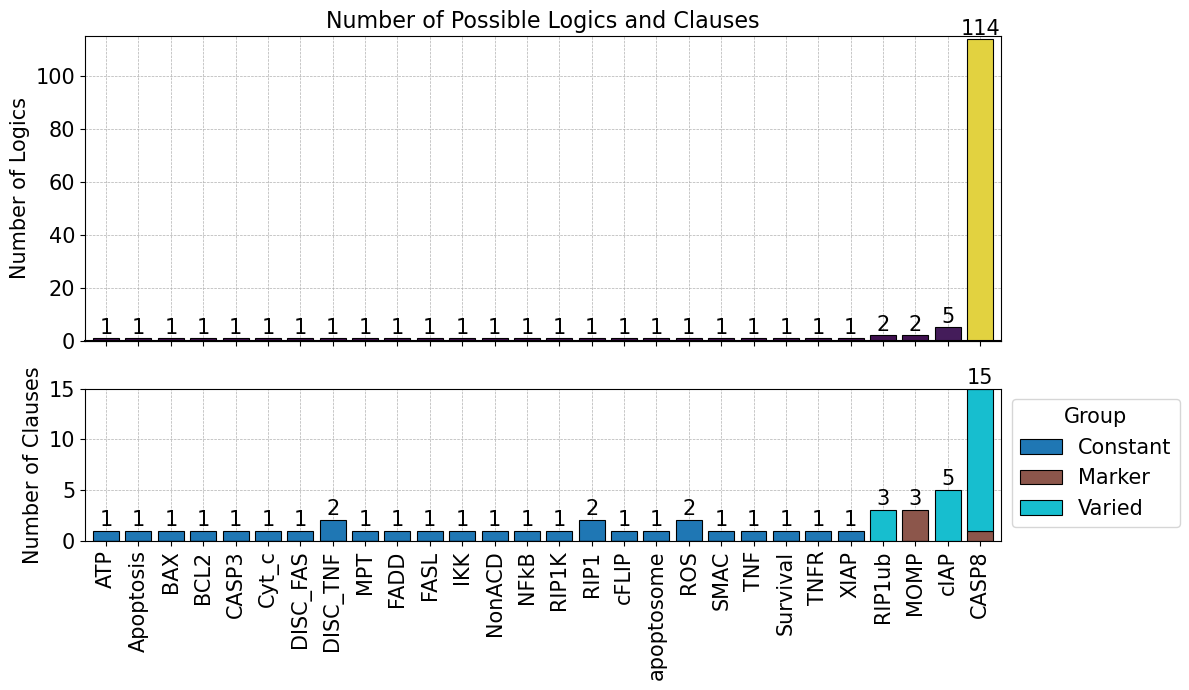

In [45]:
# Create a figure with two subplots sharing the x-axis
fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Plot 1
## Plot the first barplot
sns.barplot(
    x=sorted_var_logic_length.index, 
    y=sorted_var_logic_length.values, 
    palette=sns.color_palette("viridis", as_cmap=True)(sorted_var_logic_length.values / sorted_var_logic_length.max()), 
    edgecolor='black', linewidth=0.8, ax=axes[0], width=0.8
)
## Annotate the total number of logics
for index, value in enumerate(sorted_var_logic_length.astype('int')):
    axes[0].text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=15)
## Customize the first plot
axes[0].axhline(0, color="k", clip_on=False)
axes[0].set_ylabel('Number of Logics', fontsize=15)
axes[0].set_title('Number of Possible Logics and Clauses', fontsize=16)
axes[0].tick_params(axis='x', rotation=90, labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_ylim(0, sorted_var_logic_length.max() + 1)
axes[0].grid(linestyle='--', linewidth=0.5)
axes[0].set_axisbelow(True)

# Plot 2
## Plot the second stacked barplot
features_df_grouped = features_df.groupby(['Node', 'Group']).size().unstack(fill_value=0)
features_df_grouped = features_df_grouped.loc[sorted_var_logic_length.index]
features_df_grouped.plot(
    kind='bar', stacked=True, colormap='tab10', ax=axes[1], edgecolor='black', linewidth=0.8, width=0.8
)
## Annotate the total number of clauses
total_clauses = features_df_grouped.sum(axis=1)
for index, value in enumerate(total_clauses.astype('int')):
    axes[1].text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=15)
## Customize the second plot
axes[1].set_ylabel('Number of Clauses', fontsize=15)
axes[1].set_xlabel(None)
axes[1].legend(title='Group', bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=15, title_fontsize=15)
axes[1].tick_params(axis='x', rotation=90, labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].set_ylim(0, features_df_grouped.values.max() + 1)
axes[1].grid(linestyle='--', linewidth=0.5)
axes[1].set_axisbelow(True)

# Ensure both subplots have the same x-ticks and labels
xticks = range(len(sorted_var_logic_length.index))
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(sorted_var_logic_length.index, rotation=90, fontsize=15)
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(sorted_var_logic_length.index, rotation=90, fontsize=15)

plt.tight_layout()
#plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/hh_logic_features.png', dpi = 600, bbox_inches='tight')
#plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/hh_logic_features.pdf', bbox_inches='tight')
plt.show()
plt.close()

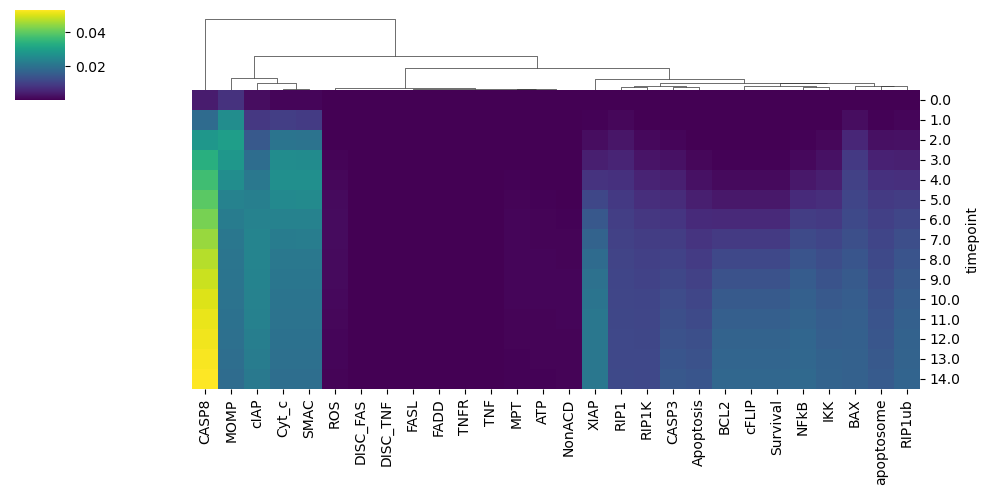

In [49]:
import pandas as pd

# Assuming `model_mtx` is your DataFrame with genes as columns and 'timepoint' as one of the columns
model_mtx = model.trajectory.simulation_df

# Group by 'timepoint' and calculate variance for each gene
variance_results = model_mtx.groupby('timepoint')[model_mtx.columns[:-3]].var()
variance_results['avg'] = variance_results.mean(axis = 1)

sns.clustermap(variance_results.drop(columns = ['avg']), row_cluster=False, cmap = 'viridis', figsize = (10,5))
plt.show()

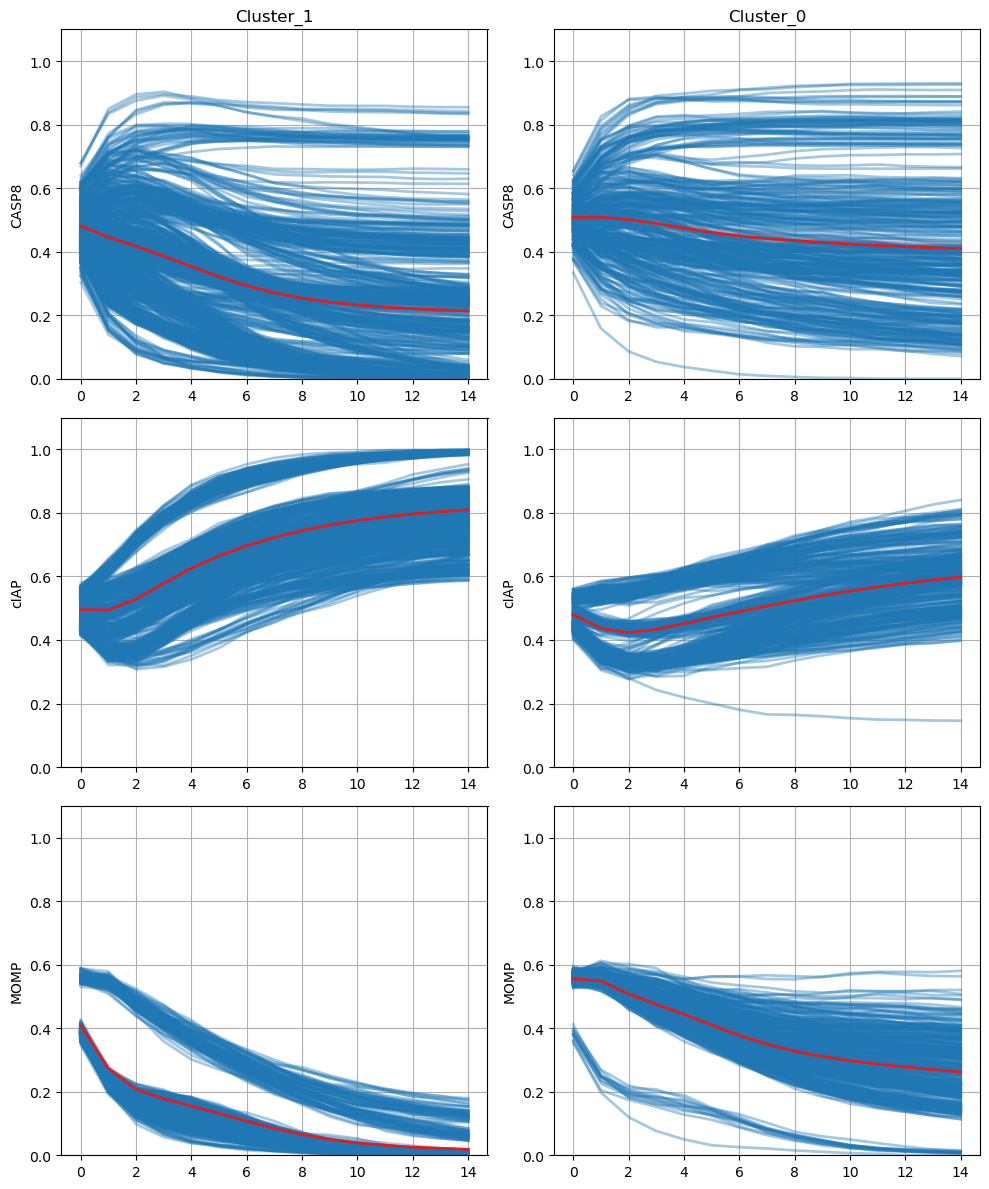

In [54]:
# Setup the gene list
selected_genes = ['CASP8', 'cIAP','MOMP']
num_timesteps = 15
simulation_df['type'] = simulation_df['model_id'].map(model.trajectory.cluster_dict)
cluster_type = list(simulation_df.type.unique())

# Function to create matrix for each condition
def create_vis_matrix(cluster_type):
    vis = simulation_df.loc[simulation_df['type'] == cluster_type]
    vis = vis[selected_genes + ['timepoint', 'model_id']]
    vis = vis[vis.timepoint.isin(range(0, num_timesteps))]
    vis['model_id'] = vis['model_id'].astype('str')
    vis['type'] = cluster_type
    return vis

# Create matrices for each condition
vis_matrices = [create_vis_matrix(i) for i in cluster_type]

# Plot with Seaborn
plt.figure(figsize=(len(cluster_type) * 5, len(selected_genes) * 4))
n_genes = len(selected_genes)

for i, gene in enumerate(selected_genes):
    for j, vis in enumerate(vis_matrices):
        plt.subplot(n_genes, len(cluster_type), len(cluster_type) * i + j + 1)
        plot = sns.lineplot(data=vis, x='timepoint', y=gene, lw=2, 
                            units = 'model_id', estimator = None, alpha = 0.4)
        plot.set_ylim(0, 1.1)
        plot.set_ylabel(gene)
        plot.set_xlabel(None)
        plot.grid(True)
        if i == 0:
            plot.set_title(f'Cluster_{cluster_type[j]}')
            
for i, gene in enumerate(selected_genes):
    for j, vis in enumerate(vis_matrices):
        plt.subplot(n_genes, len(cluster_type), len(cluster_type) * i + j + 1)
        plot = sns.lineplot(data=vis, x='timepoint', y=gene, lw=2, hue = 'type',palette='Set1')
        plot.set_ylim(0, 1.1)
        plot.set_ylabel(gene)
        plot.grid(True)
        plot.set_xlabel(None)
        plot.legend().remove()

plt.tight_layout()
plt.show()
plt.close()

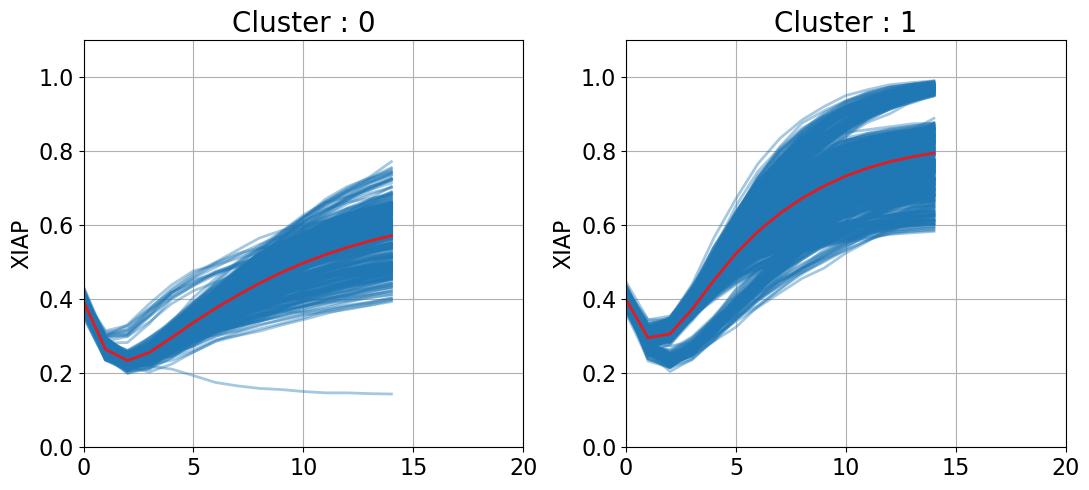

In [50]:
# Filter for clusters 0 and 2 and gene 'GF'
selected_gene = 'XIAP'
selected_clusters = [0, 1]
num_timesteps = 15

# Prepare data for each cluster
plt.figure(figsize=(11, 5))
for idx, cluster in enumerate(selected_clusters):
    vis = simulation_df.loc[simulation_df['type'] == cluster]
    vis = vis[[selected_gene, 'timepoint', 'model_id']]
    vis = vis[vis.timepoint.isin(range(0, num_timesteps))]
    vis['model_id'] = vis['model_id'].astype('str')
    vis['type'] = cluster

    plt.subplot(1, 2, idx + 1)
    plot = sns.lineplot(data=vis, x='timepoint', y=selected_gene, lw=2, 
                        units='model_id', estimator=None, alpha=0.4)
    plot.set_ylim(0, 1.1)
    plot.set_ylabel(selected_gene, fontsize = 16)
    plot.tick_params(axis='x', labelsize=16)
    plot.tick_params(axis='y', labelsize=16)
    plot.set_xlabel('timepoint', fontsize = 16)
    plot.grid(True)
    plot.set_title(f'Cluster : {cluster}', fontsize = 20)

for idx, cluster in enumerate(selected_clusters):
    vis = simulation_df.loc[simulation_df['type'] == cluster]
    vis = vis[[selected_gene, 'timepoint', 'model_id']]
    vis = vis[vis.timepoint.isin(range(0, num_timesteps))]
    vis['model_id'] = vis['model_id'].astype('str')
    vis['type'] = cluster

    plt.subplot(1, 2, idx + 1)
    plot = sns.lineplot(data=vis, x='timepoint', y=selected_gene, lw=2, hue='type', palette='Set1')
    plot.set_ylim(0, 1.1)
    plot.set_ylabel(gene, fontsize=16)
    plot.tick_params(axis='x', labelsize=16)
    plot.tick_params(axis='y', labelsize=16)
    plot.grid(True)
    plot.set_xlabel(None)
    plot.set_ylabel(selected_gene)
    plot.set_xlim(0,20)
    plot.legend().remove()


plt.tight_layout()
#plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/HH_dynamic_cluster0_1_CDK46CycD.png', dpi = 600,bbox_inches='tight')
#plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/HH_dynamic_cluster0_1_CDK46CycD.pdf', bbox_inches='tight')

plt.show()
plt.close()


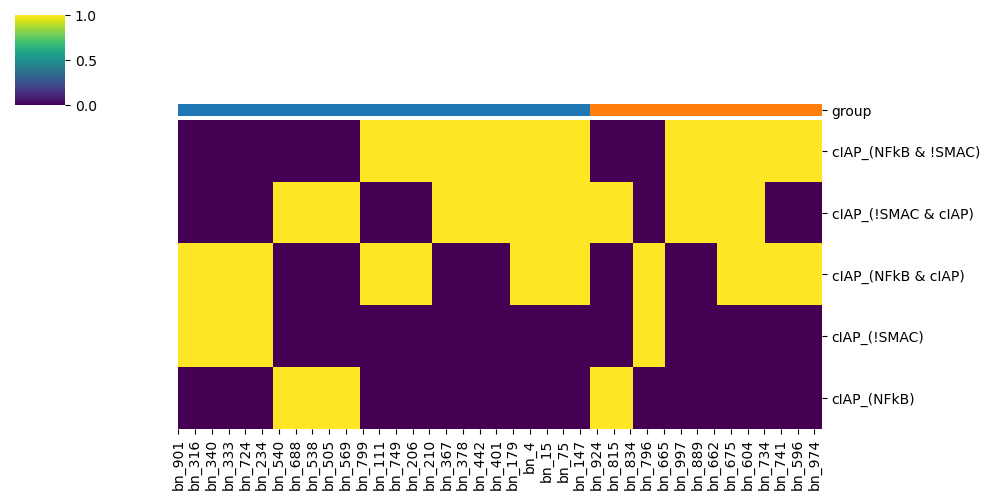

In [55]:
from scipy.cluster.hierarchy import linkage, leaves_list

selected_features = features_df.loc[(features_df['Node'] == 'cIAP')].Feature

# Create a color palette for the groups
unique_groups = test['group'].unique()
color_0 = sns.color_palette("tab10")[0]
color_2 = sns.color_palette("tab10")[1]
palette = [color_0,color_2]
group_colors = test['group'].map(dict(zip(unique_groups, palette)))

# Create the clustermap with row colors and separated cluster groups
# First, sort the DataFrame by cluster group to visually separate them
sorted_idx = test.sort_values('group').index

# Get the split point between the two clusters
split_point = (test.loc[sorted_idx, 'group'] == unique_groups[1]).idxmax()

# Perform row clustering only within each cluster group

# Cluster for group 0
group0_idx = test.loc[sorted_idx, 'group'] == unique_groups[0]
linkage0 = linkage(test.loc[sorted_idx[group0_idx], selected_features], method='average', metric='euclidean')
leaves0 = sorted_idx[group0_idx][leaves_list(linkage0)]

# Cluster for group 2
group2_idx = test.loc[sorted_idx, 'group'] == unique_groups[1]
linkage2 = linkage(test.loc[sorted_idx[group2_idx], selected_features], method='average', metric='euclidean')
leaves2 = sorted_idx[group2_idx][leaves_list(linkage2)]

# Concatenate the leaves to get the new row order
clustered_idx = leaves0.append(leaves2)

sns.clustermap(
    test.loc[clustered_idx, selected_features].transpose(),
    col_cluster=False,
    row_cluster=False,
    cmap='viridis',
    figsize=(10, 5),
    col_colors=group_colors.loc[clustered_idx]
)

#plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/HH_heatmap_logic_CDK46CycD.png', dpi = 500, bbox_inches='tight')
#plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/HH_heatmap_logic_CDK46CycD.pdf', bbox_inches='tight')
plt.show()
plt.close()